In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
df = pd.read_csv('pet-diesel-US.csv')
df.head(3)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100


In [12]:
# Check the dataset's shape (number of rows and columns)
df.shape

(1361, 14)

In [13]:
# Check for missing values
df.isna().sum()

Date    0
A1      0
A2      0
A3      0
R1      0
R2      0
R3      0
M1      0
M2      0
M3      0
P1      0
P2      0
P3      0
D1      0
dtype: int64

In [14]:
# Get summary statistics for numerical columns
df.describe()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


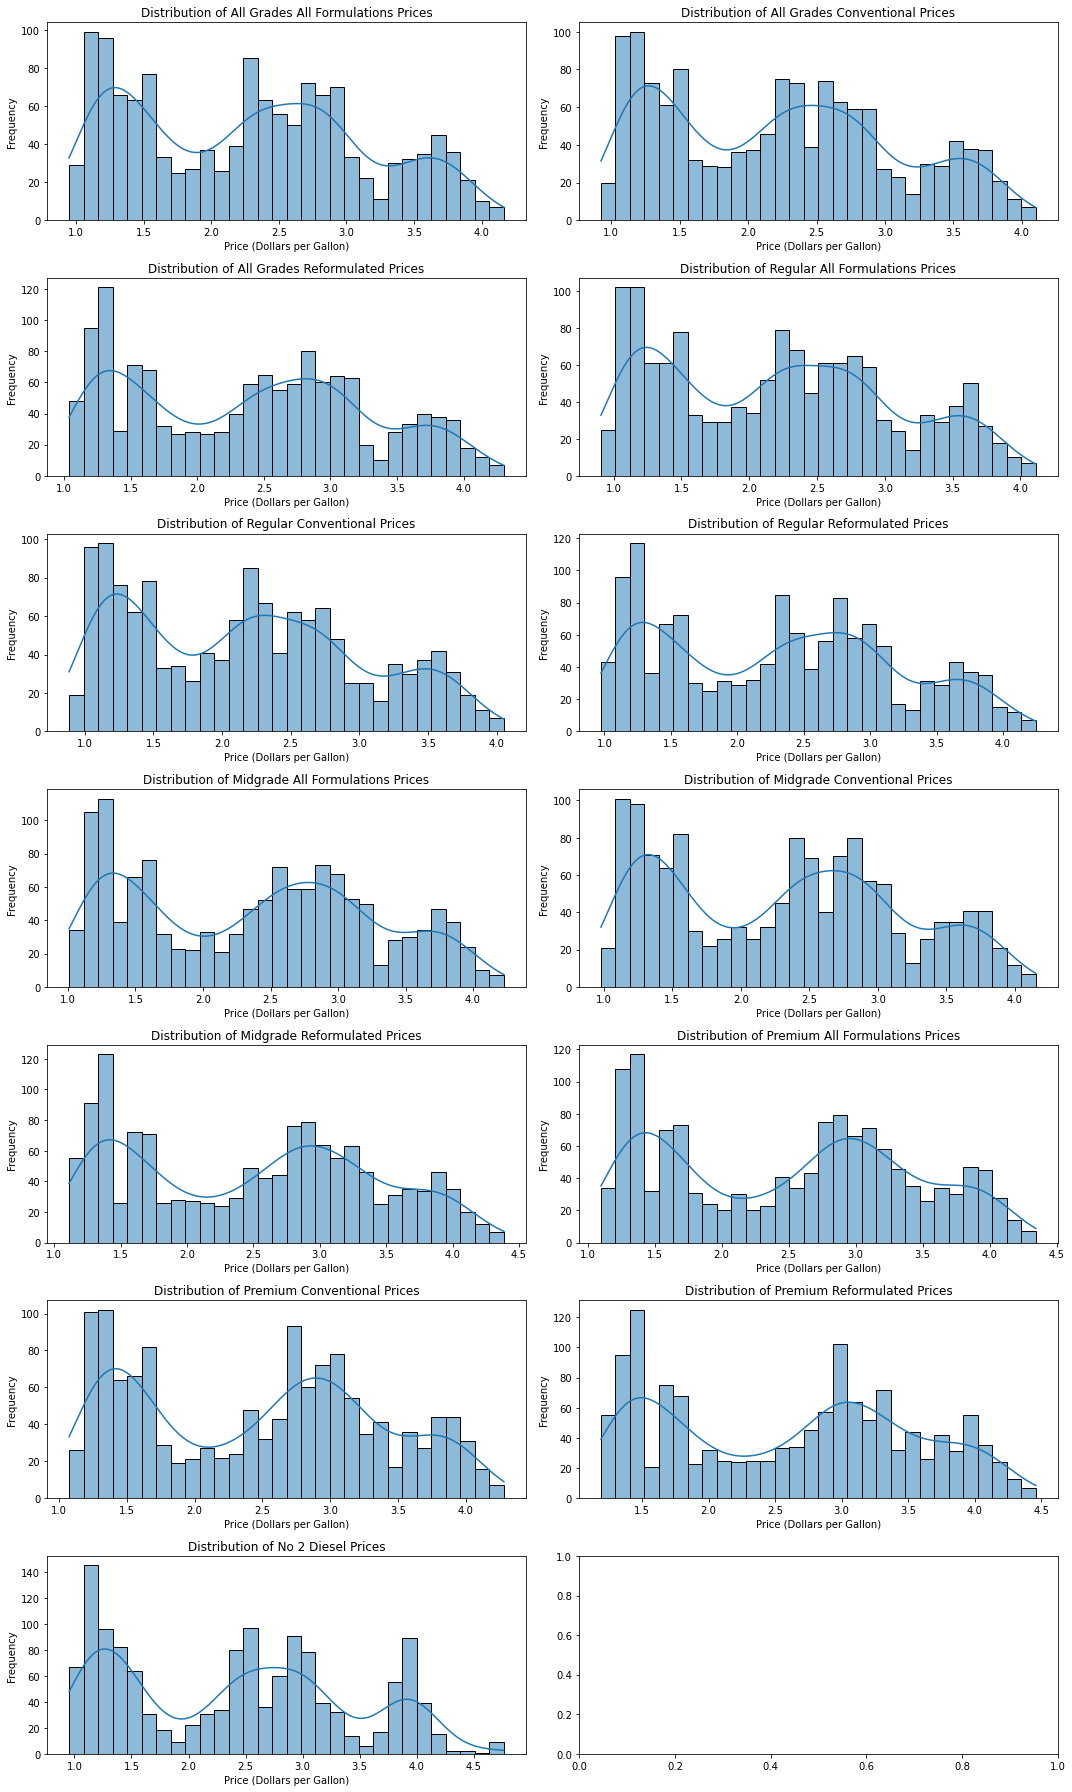

In [15]:
prices = ['A1', 'A2', 'A3', 'R1', 'R2', 'R3', 'M1', 'M2', 'M3', 'P1', 'P2', 'P3', 'D1']
titles = [
    'All Grades All Formulations',
    'All Grades Conventional',
    'All Grades Reformulated',
    'Regular All Formulations',
    'Regular Conventional',
    'Regular Reformulated',
    'Midgrade All Formulations',
    'Midgrade Conventional',
    'Midgrade Reformulated',
    'Premium All Formulations',
    'Premium Conventional',
    'Premium Reformulated',
    'No 2 Diesel',
]

fig, axes = plt.subplots(7, 2, figsize=(15, 25))
axes = axes.ravel()

for i, (price, title) in enumerate(zip(prices, titles)):
    sns.histplot(df[price], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {title} Prices')
    axes[i].set_xlabel('Price (Dollars per Gallon)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

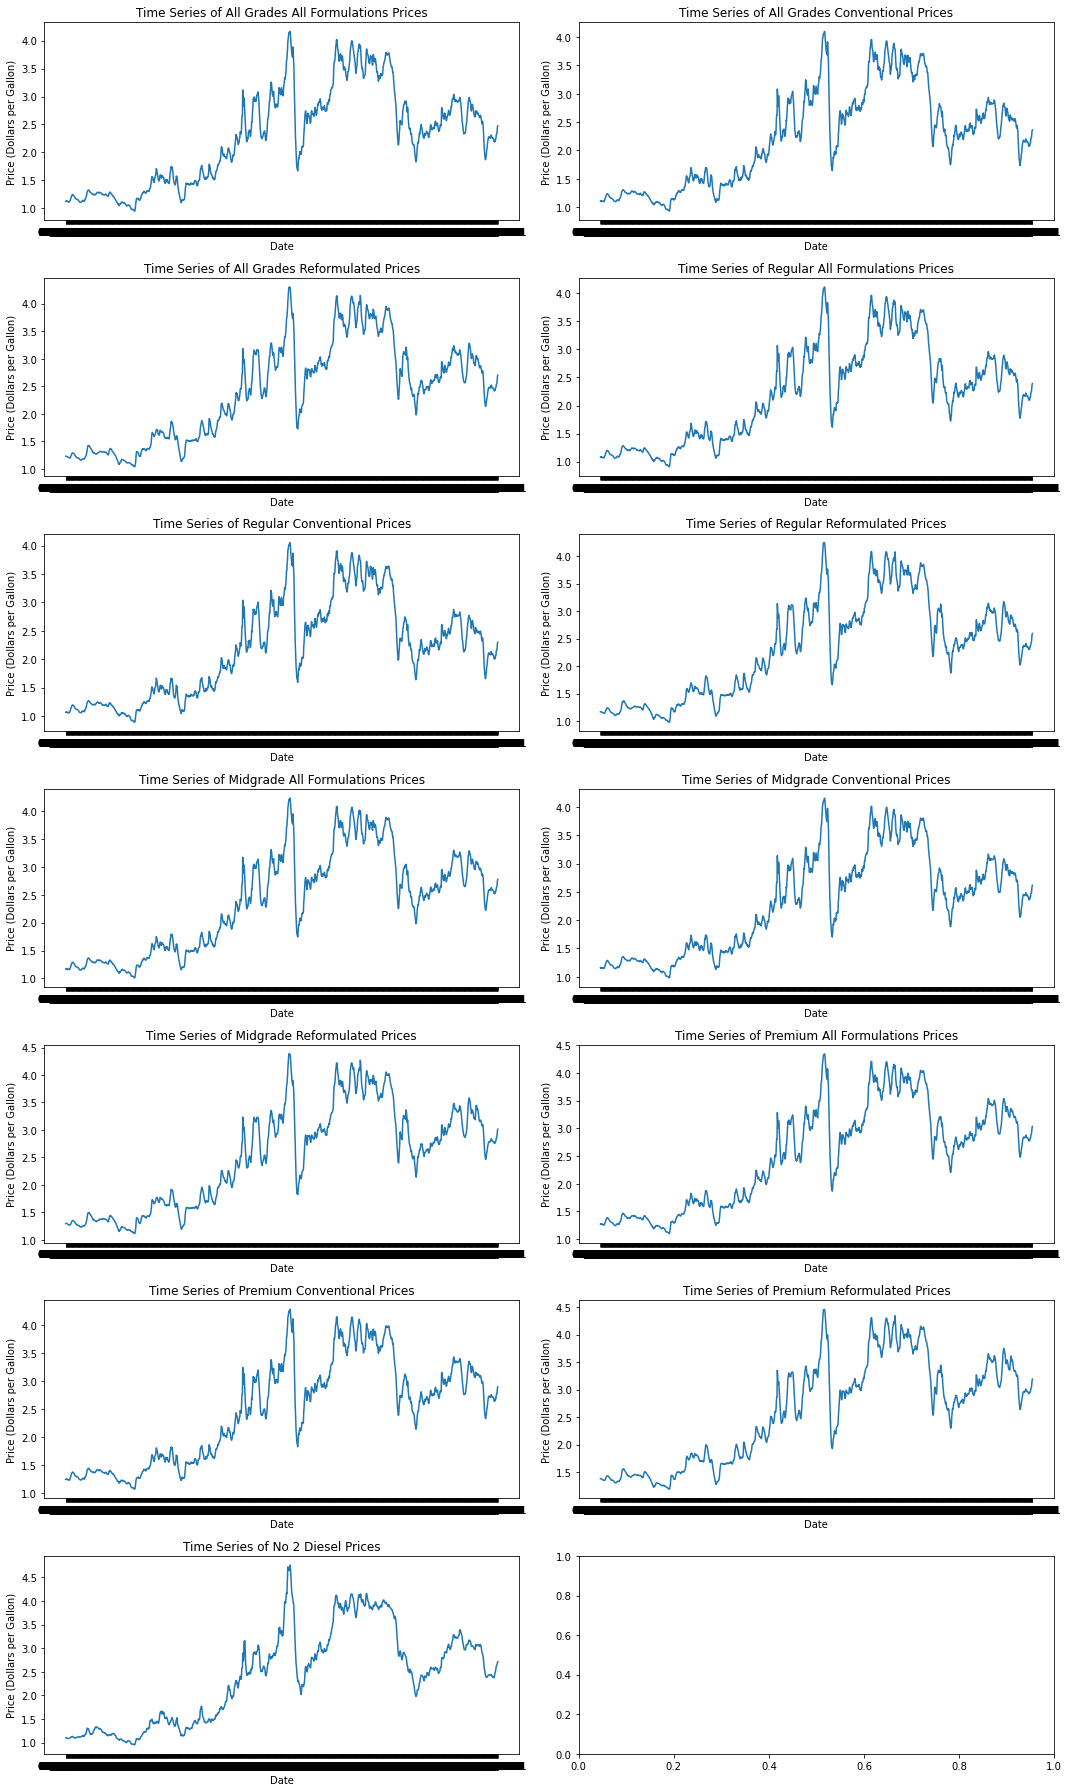

In [16]:
fig, axes = plt.subplots(7, 2, figsize=(15, 25))
axes = axes.ravel()

for i, (price, title) in enumerate(zip(prices, titles)):
    axes[i].plot(df['Date'], df[price])
    axes[i].set_title(f'Time Series of {title} Prices')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price (Dollars per Gallon)')

plt.tight_layout()
plt.show()

#### Feature Selection

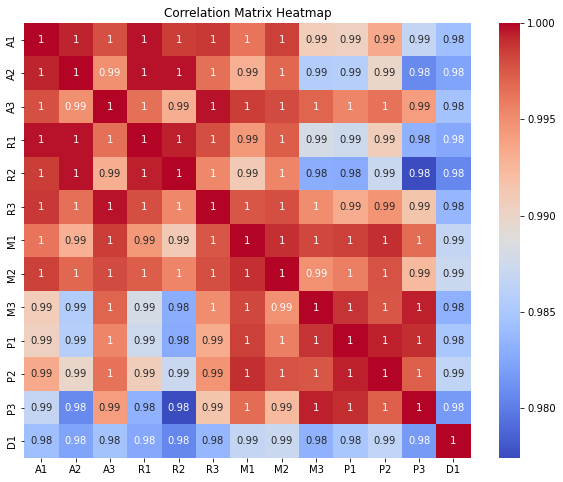

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Random Forest Regression

In [19]:
# Prepare the data for modeling
X = df.drop(['Date', 'A1'], axis=1)  # Drop 'Date' and the target column 'A1'
y = df['A1']  # The target variable is 'A1'

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Get feature importances from the model
importances = model.feature_importances_

# Display the feature importances along with the feature names
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

A2: 0.09016344460458797
A3: 0.0014068244602802448
R1: 0.6593781541333041
R2: 0.031238013625068242
R3: 0.034631308576835454
M1: 0.020478944060763688
M2: 0.1463122730704582
M3: 0.0004920050654814742
P1: 0.0110806957198912
P2: 0.004150541624668041
P3: 0.0006333818838777452
D1: 3.441317478354583e-05


Based on the calculated feature importances, it appears that the most important features for the Random Forest Regression model are R1, A2, and M2. The other features have relatively lower importance values.

Here's a brief summary of the top 3 features:

- R1 (Weekly U.S. Regular All Formulations Retail Gasoline Prices): 65.94%
- A2 (Weekly U.S. All Grades Conventional Retail Gasoline Prices): 9.02%
- M2 (Weekly U.S. Midgrade Conventional Retail Gasoline Prices): 14.63%

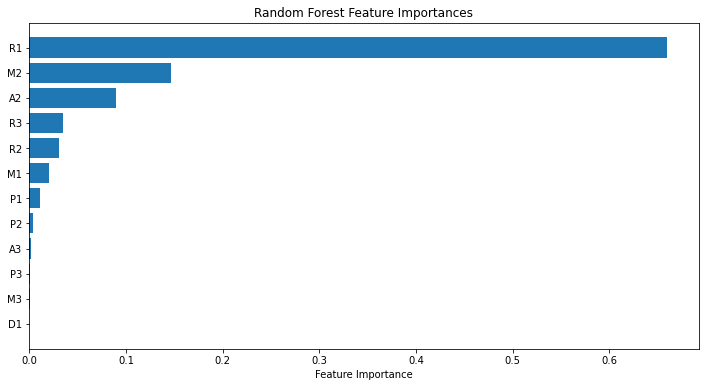

In [24]:
# Sort the features and their importances
sorted_idx = np.argsort(importances)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(range(X.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

Embedded methods: These methods incorporate feature selection as part of the model training process. Examples include Lasso and Elastic Net regularization for linear models, and feature importances in tree-based models like Random Forest and XGBoost.

In [25]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.005019608801955988
Mean Squared Error: 5.68451491442549e-05
R-squared: 0.9999184315654386


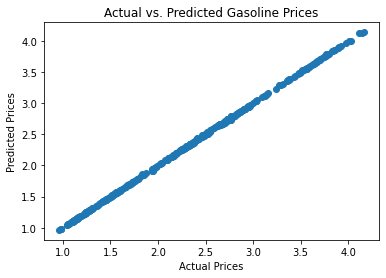

In [26]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Gasoline Prices')
plt.show()


#### Prediction

In [28]:
# Example: Create a new DataFrame with the same columns as the original data
new_data = pd.DataFrame(columns=X.columns)

In [29]:
# Add the features of the new instance (replace with actual values)
new_instance = {
    'A2': 2.50,
    'A3': 2.60,
    'R1': 2.45,
    'R2': 2.40,
    'R3': 2.55,
    'M1': 2.70,
    'M2': 2.75,
    'M3': 2.80,
    'P1': 2.95,
    'P2': 3.00,
    'P3': 3.05,
    'D1': 2.85,
}

In [30]:
# Append the new instance to the new_data DataFrame
new_data = new_data.append(new_instance, ignore_index=True)

In [31]:
# Predict the price using the Random Forest model
predicted_price = model.predict(new_data)

# Print the predicted price
print(f"Predicted price for the new instance: {predicted_price[0]}")

Predicted price for the new instance: 2.566099999999999
